In [18]:
using Plots
using DataFrames: Not, DataFrame, select
using Distributions: Normal
using LightGBM.MLJInterface: LGBMRegressor
using MLJ: fit!, machine, predict
using Random: seed!
using Shapley: MonteCarlo, shapley
using StableRNGs: StableRNG
using Statistics: cor, mean

In [19]:
# Funções e geração de dados
y_true(x) = 2x + 10
y_noise(x, coefficient) = coefficient * y_true(x) + rand(Normal(0, 40))
indexes = 1.0:150.0
r2(x) = round(x; digits=2)


r2 (generic function with 1 method)

In [20]:
df = let
    seed!(0)
    X = indexes
    T = y_noise.(indexes, 0)
    U = y_noise.(indexes, 0.05)
    V = y_noise.(indexes, 0.7)
    W = y_noise.(indexes, 1)
    Y = y_noise.(indexes, 1)

    DataFrame(; X, T, U, V, W, Y)
end

Row,X,T,U,V,W,Y
,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,37.7188,-5.61088,11.9561,12.1441,19.1759
2,2.0,5.35691,-65.7259,21.7467,27.0804,-26.0083
3,3.0,61.0028,-7.06661,1.05973,22.6588,-72.1792
4,4.0,4.95605,0.0830817,-68.0209,27.5124,109.146
5,5.0,-48.2309,3.72674,50.7662,32.4407,-27.9034
6,6.0,12.4727,8.59667,61.0154,0.215236,50.5563
7,7.0,-9.38565,0.888579,-3.47392,36.6952,42.0977
8,8.0,-43.4941,19.4709,27.1996,85.7672,57.5553
9,9.0,18.4924,-84.6015,35.4103,53.3868,10.1422


In [21]:
# Regressor
function regressor()
    kwargs = [
        :num_leaves => 9,
        :max_depth => 3,
        :min_data_per_group => 2,
        :learning_rate => 0.5
    ]
    return LGBMRegressor( ; kwargs...)
end

regressor (generic function with 1 method)

In [22]:
# Ajustar o modelo
function fit_model(df::DataFrame)
    X = select(df, Not([:X, :Y]))
    y = df.Y
    m = fit!(machine(regressor(), X, y))
    return X, y, m
end

fit_model (generic function with 1 method)

In [23]:
# Calcular os valores de Shapley
function shapley_values(df::DataFrame)
    X, y, m = fit_model(df)
    mc = MonteCarlo(1024)
    return shapley(x -> predict(m, x), mc, X)
end

shapley_values (generic function with 1 method)

In [24]:
# Plot com scatter plot e ajuste de tamanho
function plot_data(df::DataFrame)
    p1 = scatter(df.X, df.T, label="T", ms=5, title="T vs X", xlabel="X", ylabel="T", legend=:bottomright)
    p2 = scatter(df.X, df.U, label="U", ms=5, title="U vs X", xlabel="X", ylabel="U", legend=:bottomright)
    p3 = scatter(df.X, df.V, label="V", ms=5, title="V vs X", xlabel="X", ylabel="V", legend=:bottomright)
    p4 = scatter(df.X, df.W, label="W", ms=5, title="W vs X", xlabel="X", ylabel="W", legend=:bottomright)
    p5 = scatter(df.X, df.Y, label="Y", ms=5, title="Y vs X", xlabel="X", ylabel="Y", legend=:bottomright)
    
    return plot(p1, p2, p3, p4, p5, layout=(5, 1), size=(800, 1000))  # Ajuste de tamanho e layout
end

plot_data (generic function with 1 method)

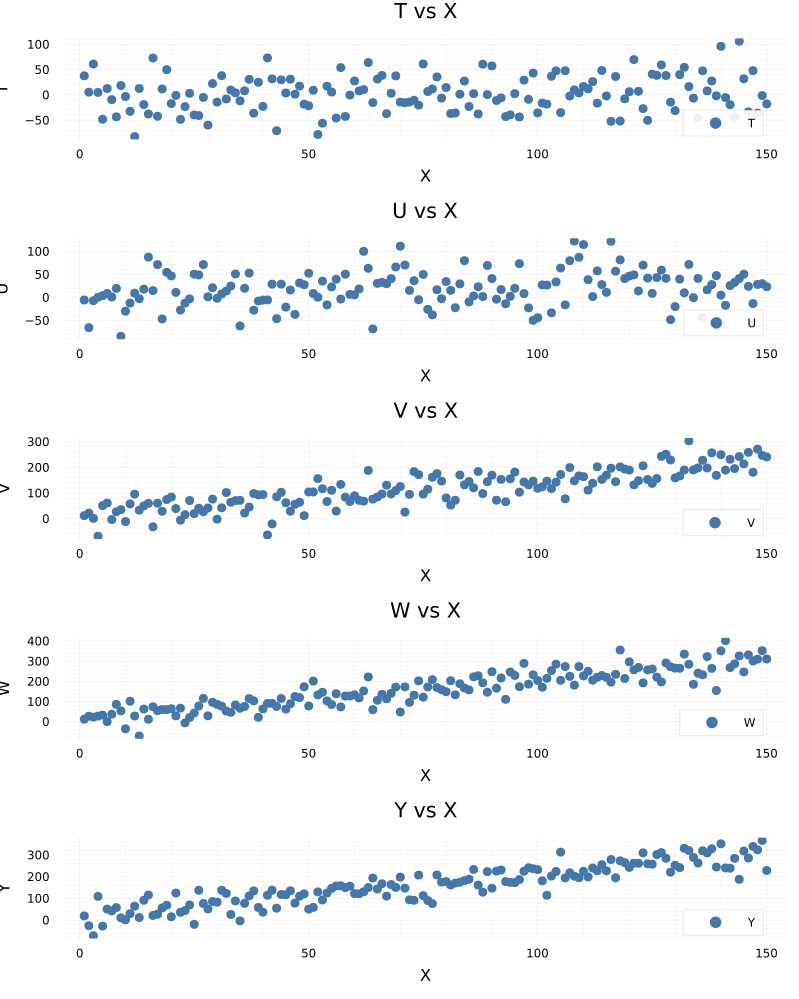

In [26]:
# Exibir o gráfico
plot_data(df)

In [27]:
function regressor()
    kwargs = [
        :num_leaves => 9,
        :max_depth => 3,
        :min_data_per_group => 2,
        :learning_rate => 0.5
    ]
    return LGBMRegressor( ; kwargs...)
end;

In [28]:
function fit_model(df::DataFrame)
    X = select(df, Not([:X, :Y]))
    y = df.Y
    m = fit!(machine(regressor(), X, y))
    return X, y, m
end;

In [30]:
function shapley_values(df::DataFrame)
    X, y, m = fit_model(df)
    mc = MonteCarlo(1024)
    return shapley(x -> predict(m, x), mc, X)
end

shapley_values (generic function with 1 method)